In [3]:
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

In [5]:
data_amp = pd.read_csv('MPA_fish_bar_2004-2023_annuel.csv')
data_atpp = pd.read_csv('ATPP_fish_bar_1990-2023_annuel.csv')
data_all = pd.read_csv('fish_bar_1983-2023_biannuel.csv')

In [7]:
type(data_amp['YearSeason'][0])

str

In [28]:
data_atpp.rename(columns={'Date': 'YearSeason'}, inplace=True)

In [29]:
# merge the 3 dataframes on the date column
data = pd.merge(data_all, data_amp, on='YearSeason', how ='outer')
data_tot = pd.merge(data, data_atpp, on='YearSeason', how ='outer')

In [30]:
data_tot['C']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
107    0.151419
108    0.175050
109    0.182355
110    0.171248
111    0.184458
Name: C, Length: 112, dtype: float64

In [31]:
# create a list of the columns to merge
C = ['C', 'C_x', 'C_y']
Co = ['Co', 'Co_x', 'Co_y']
P = ['P', 'P_x', 'P_y']
Pi = ['Pi', 'Pi_x', 'Pi_y']
H = ['H', 'H_x', 'H_y']
O = ['O', 'O_x', 'O_y']
Total = ['Total', 'Total_x', 'Total_y']

groups = [C, Co, P, Pi, H, O, Total]

for i in range(len(data_tot)):
    for group in groups:
        # mean per group
        data_tot.loc[i, group[0]] = data_tot.loc[i, group].mean()

In [32]:
# create a list of the columns to merge
C = ['C_x', 'C_y']
Co = ['Co_x', 'Co_y']
P = ['P_x', 'P_y']
Pi = ['Pi_x', 'Pi_y']
H = ['H_x', 'H_y']
O = ['O_x', 'O_y']
Total = ['Total_x', 'Total_y']

groups = [C, Co, P, Pi, H, O, Total]

for i in range(len(data)):
    for group in groups:
        # mean per group
        data.loc[i, group[0]] = data_tot.loc[i, group].mean()

In [33]:
data.drop(['C_y', 'Co_y', 'P_y', 'Pi_y', 'H_y', 'O_y', 'Total_y'], axis=1, inplace=True)

In [34]:
# rename the columns
data.rename(columns={'C_x': 'C', 'Co_x': 'Co', 'P_x': 'P', 'Pi_x': 'Pi', 'H_x': 'H', 'O_x': 'O', 'Total_x': 'Total'}, inplace=True)

In [35]:
data_tot.drop(columns=['C_x', 'C_y', 'Co_x', 'Co_y', 'P_x', 'P_y', 'Pi_x', 'Pi_y', 'H_x', 'H_y', 'O_x', 'O_y', 'Total_x', 'Total_y'], inplace=True)

In [36]:
data_tot['Total'] = data_tot['Total'] / data_tot['Total'].max()

In [37]:
data['Total'] = data['Total'] / data['Total'].max()

In [38]:
# sort by date
data_tot.sort_values(by=['YearSeason'], inplace=True)

In [39]:
data.sort_values(by=['YearSeason'], inplace=True)

In [40]:
data_tot.to_csv('FINAL_fish_bar_1983-2023.csv', index=False)

In [41]:
data.to_csv('FINAL_fish_bar_1983-2023_without-atpp.csv', index=False)

In [42]:
data_tot.set_index('YearSeason', inplace=True)
data_tot.index = pd.to_datetime(data_tot.index)

In [43]:
data.set_index('YearSeason', inplace=True)
data.index = pd.to_datetime(data.index)

c:\miniconda\envs\Python_update\lib\site-packages\matplotlib\axis.py:1769: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ret = self.converter.convert(x, self.units, self)
c:\miniconda\envs\Python_update\lib\site-packages\matplotlib\axis.py:1769: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ret = self.converter.convert(x, self.units, self)
c:\miniconda\envs\Python_update\lib\site-packages\matplotlib\axis.py:1769: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ret = self.converter.convert(x, self.units, self)
c:\miniconda\envs\Python_update\lib\site-packages\matplotlib\axis.p

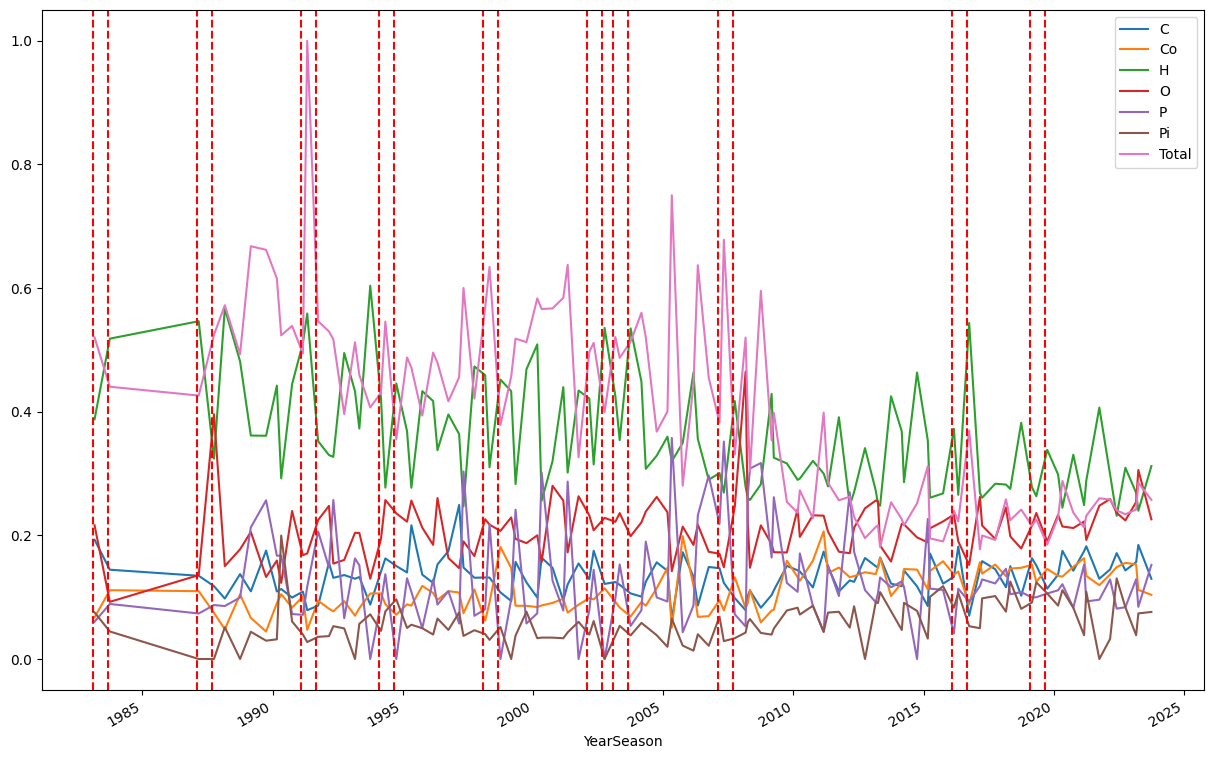

In [44]:
data_tot.plot(figsize=(15, 10))
# bleaching events list
list_bleaching = ['1983-02', '1983-09', '1987-02', '1987-09','1991-02', '1991-09', '1994-02', '1994-09', '1998-02', '1998-09', '2002-02', '2002-09', '2003-02', '2003-09', '2007-02', '2007-09', '2016-02', '2016-09', '2019-02', '2019-09']

# add vertical lines
for year in list_bleaching:
    plt.axvline(x=year, color='r', linestyle='--')

c:\miniconda\envs\Python_update\lib\site-packages\matplotlib\axis.py:1769: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ret = self.converter.convert(x, self.units, self)
c:\miniconda\envs\Python_update\lib\site-packages\matplotlib\axis.py:1769: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ret = self.converter.convert(x, self.units, self)
c:\miniconda\envs\Python_update\lib\site-packages\matplotlib\axis.py:1769: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ret = self.converter.convert(x, self.units, self)
c:\miniconda\envs\Python_update\lib\site-packages\matplotlib\axis.p

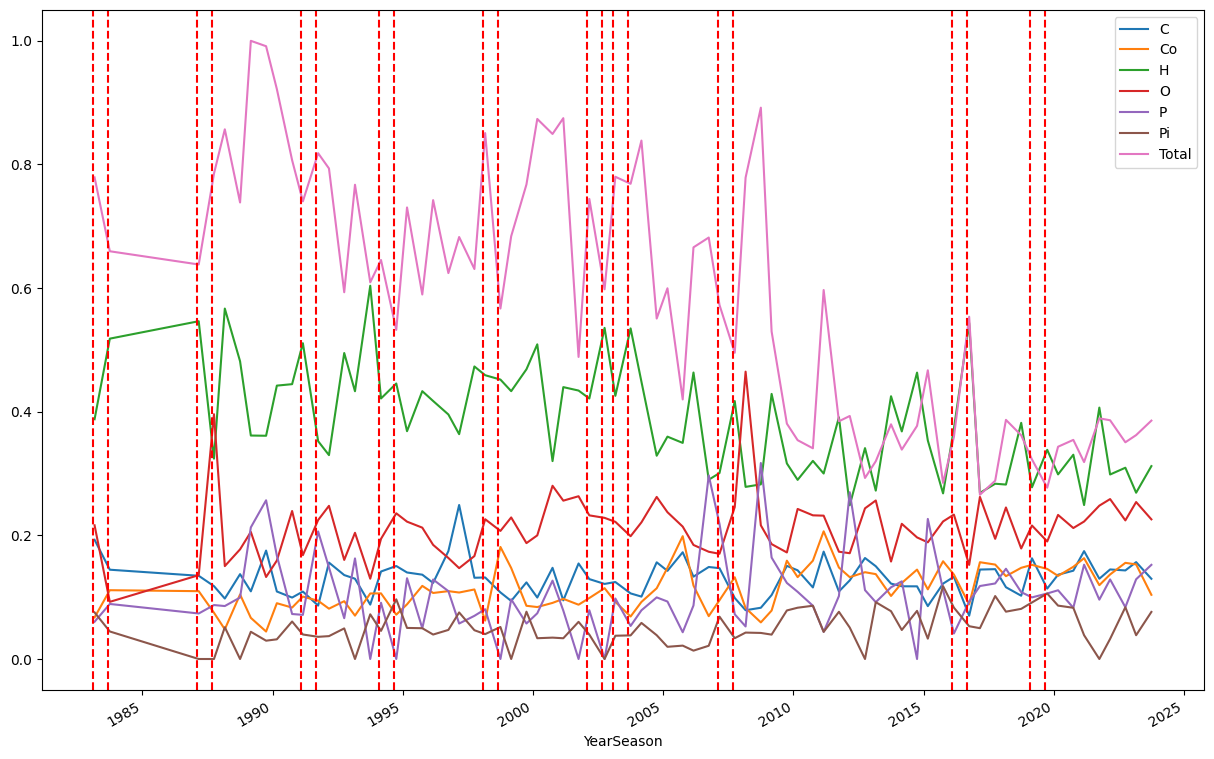

In [45]:
data.plot(figsize=(15, 10))
# bleaching events list
list_bleaching = ['1983-02', '1983-09', '1987-02', '1987-09','1991-02', '1991-09', '1994-02', '1994-09', '1998-02', '1998-09', '2002-02', '2002-09', '2003-02', '2003-09', '2007-02', '2007-09', '2016-02', '2016-09', '2019-02', '2019-09']

# add vertical lines
for year in list_bleaching:
    plt.axvline(x=year, color='r', linestyle='--')

# Ici total est normalisé par rapport à son max, les autres sont en proportion : pour avoir leur évolution quantitative, multiplier la proportion par le total

In [46]:
# moyenner les données par année
data_year = data_tot.copy()
data_year.reset_index(inplace=True)
data_year['Year'] = data_year['YearSeason'].astype(str).str[:4]
data_year.drop(columns=['YearSeason'], inplace=True)
data_year = data_year.groupby(['Year']).mean()
data_year.index = pd.to_datetime(data_year.index)

c:\miniconda\envs\Python_update\lib\site-packages\matplotlib\axis.py:1769: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ret = self.converter.convert(x, self.units, self)
c:\miniconda\envs\Python_update\lib\site-packages\matplotlib\axis.py:1769: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ret = self.converter.convert(x, self.units, self)
c:\miniconda\envs\Python_update\lib\site-packages\matplotlib\axis.py:1769: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ret = self.converter.convert(x, self.units, self)
c:\miniconda\envs\Python_update\lib\site-packages\matplotlib\axis.p

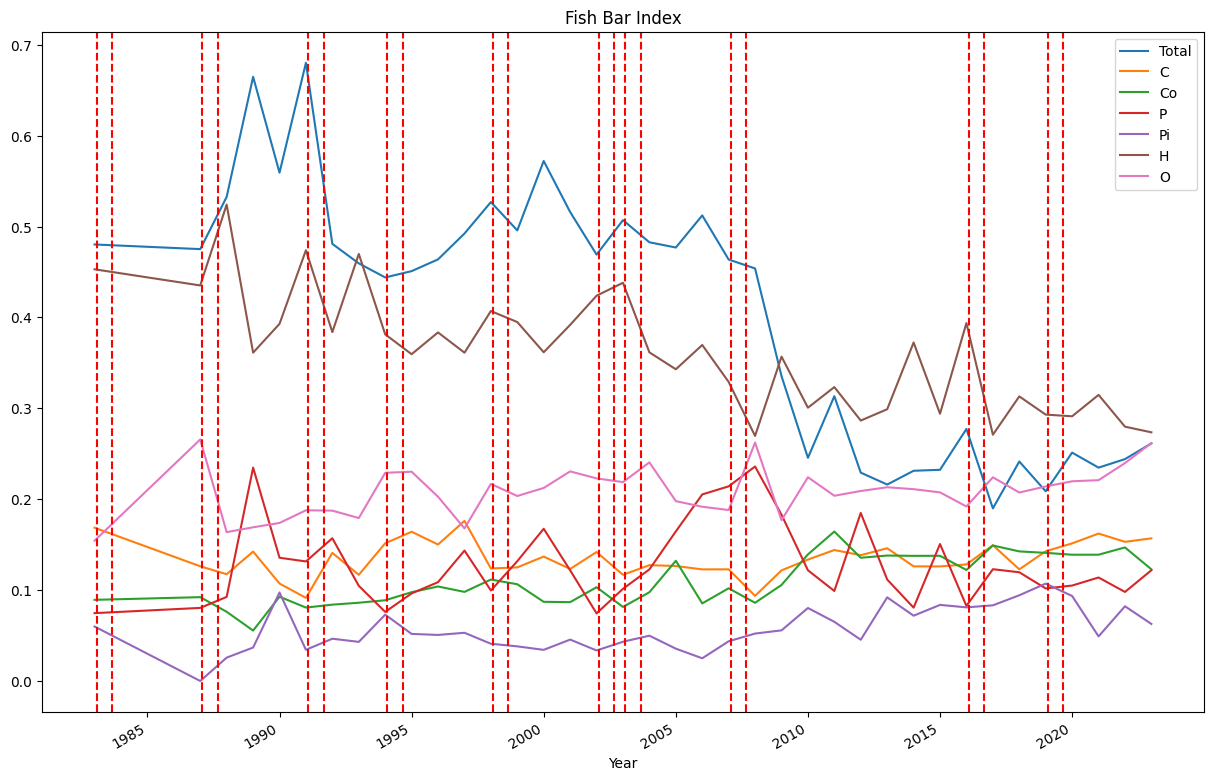

In [47]:
data_year.plot(y=['Total', 'C', 'Co', 'P', 'Pi', 'H', 'O'], figsize=(15, 10), title='Fish Bar Index')
# bleaching events list
list_bleaching = ['1983-02', '1983-09', '1987-02', '1987-09','1991-02', '1991-09', '1994-02', '1994-09', '1998-02', '1998-09', '2002-02', '2002-09', '2003-02', '2003-09', '2007-02', '2007-09', '2016-02', '2016-09', '2019-02', '2019-09']

# add vertical lines
for i in list_bleaching:
    plt.axvline(x=i, color='r', linestyle='--')

c:\miniconda\envs\Python_update\lib\site-packages\matplotlib\axis.py:1769: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ret = self.converter.convert(x, self.units, self)
c:\miniconda\envs\Python_update\lib\site-packages\matplotlib\axis.py:1769: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ret = self.converter.convert(x, self.units, self)
c:\miniconda\envs\Python_update\lib\site-packages\matplotlib\axis.py:1769: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ret = self.converter.convert(x, self.units, self)
c:\miniconda\envs\Python_update\lib\site-packages\matplotlib\axis.p

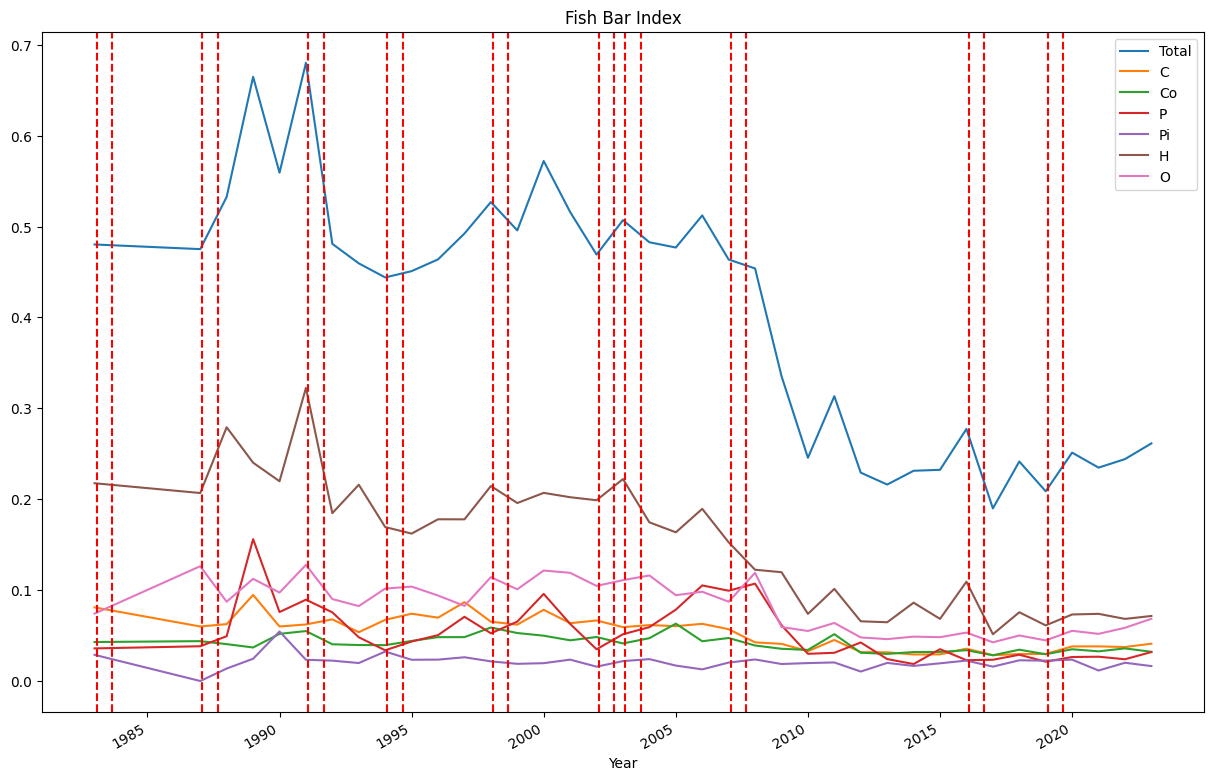

In [48]:
# copy the columns and multiply them by Total to get the actual values and not the proportions
data_abs = data_year.copy()
data_abs['C'] = data_abs['C'] * data_abs['Total']
data_abs['Co'] = data_abs['Co'] * data_abs['Total']
data_abs['P'] = data_abs['P'] * data_abs['Total']
data_abs['Pi'] = data_abs['Pi'] * data_abs['Total']
data_abs['H'] = data_abs['H'] * data_abs['Total']
data_abs['O'] = data_abs['O'] * data_abs['Total']

data_abs.plot(y=['Total', 'C', 'Co', 'P', 'Pi', 'H', 'O'], figsize=(15, 10), title='Fish Bar Index')
# bleaching events list
list_bleaching = ['1983-02', '1983-09', '1987-02', '1987-09','1991-02', '1991-09', '1994-02', '1994-09', '1998-02', '1998-09', '2002-02', '2002-09', '2003-02', '2003-09', '2007-02', '2007-09', '2016-02', '2016-09', '2019-02', '2019-09']

# add vertical lines
for i in list_bleaching:
    plt.axvline(x=i, color='r', linestyle='--')